In [227]:
import pandas as pd 
import numpy as np
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data Extraction
orig_data=pd.read_csv("data.csv",index_col=2)

## Data Summary
This session is about ...

In [3]:
orig_data.describe()
orig_data.index

Index(['SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX', 'SPX', 'VIX',
       ...
       'VXM8', 'VXK8', 'VIX', 'VXH8', 'VXG8', 'VXJ8', 'VXX7', 'VXZ7', 'VXN8',
       'SPX'],
      dtype='object', name='m_localSymbol', length=70357)

## Relation between SPX and VIX

In [211]:
def convert_daily(col_nm = "SPX"):
    fil_data =orig_data.loc[col_nm]
    # Convert datetime to date
    fil_data.date = fil_data.date.apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
    daily_data_open = fil_data.groupby(["date"]).first()
    daily_data_close = fil_data.groupby(["date"]).last()
    daily_data = daily_data_open[["open","close"]]
    daily_data.close = daily_data_close.close #daily_date.close = daily_data_close.close
    daily_data.reset_index(inplace=True)
    daily_data = daily_data.set_index(pd.DatetimeIndex(daily_data["date"]))[["open","close"]]
    return daily_data

In [212]:
VIX_daily = convert_daily("VIX")
SPX_daily = convert_daily("SPX")
# TODO Paralla graphing VIX vs SPX

In [250]:
# Weekly sell off larger than 0.02
def convert_weekly(daily_data = convert_daily("SPX"),sell_off_pct = -0.02):
    weekly_data = daily_data.groupby(pd.TimeGrouper('W')).first()
    weekly_data['wk_close'] = daily_data.groupby(pd.TimeGrouper('W')).last()[['close']]
    weekly_data = weekly_data[['open','wk_close']]
    weekly_data.columns = ['open','close']
    weekly_data['wkly_pct_chg'] = (weekly_data.close - weekly_data.open)/weekly_data.open
    weekly_data [weekly_data.wkly_pct_chg < sell_off_pct]
    return weekly_data

In [262]:
# SPX & VIX Weekly price correlation
wk_num = 1 
for end_date in weekly_data[weekly_data.wkly_pct_chg < -0.02].index:
    start_date = end_date - timedelta(days = 6)
    SPX_daily_slof_prd = SPX_daily[(SPX_daily.index < end_date) & (SPX_daily.index >= start_date)]
    VIX_daily_slof_prd = VIX_daily[(SPX_daily.index < end_date) & (SPX_daily.index >= start_date)]
#     print(SPX_daily[(SPX_daily.index < end_date) & (SPX_daily.index >= start_date)])
#     print("**VIX_daily**")
#     print(VIX_daily[(SPX_daily.index < end_date) & (SPX_daily.index >= start_date)])
    VIX_daily_slof_prd["SPX_close"] = SPX_daily_slof_prd.close

    print("**Week " + str(wk_num) + "**")
    print(VIX_daily_slof_prd[["close","SPX_close"]].corr())
    wk_num += 1

**Week 1**
              close  SPX_close
close      1.000000  -0.979634
SPX_close -0.979634   1.000000
**Week 2**
              close  SPX_close
close      1.000000  -0.951109
SPX_close -0.951109   1.000000
**Week 3**
              close  SPX_close
close      1.000000  -0.982671
SPX_close -0.982671   1.000000
**Week 4**
              close  SPX_close
close      1.000000  -0.933501
SPX_close -0.933501   1.000000
**Week 5**
              close  SPX_close
close      1.000000  -0.999822
SPX_close -0.999822   1.000000


In [164]:
# Daily percentage falls larger than 0.02
SPX_daily['daily_pct_chge'] = (SPX_daily.close - SPX_daily.open)/SPX_daily.open
SPX_daily[SPX_daily.daily_pct_chge < -0.02]

,open,close,daily_pct_chge
date,,,
2016-01-13,1945.29,1890.19,-0.028325
2016-09-09,2173.63,2128.29,-0.020859


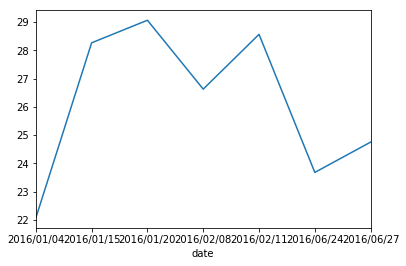

In [17]:
# VIX_daily[(SPX_daily.close.pct_change()) < -0.02].close.plot()
# plt.show()

In [103]:
VIX_daily[abs(SPX_daily.close.pct_change()) > 0.02]

,Unnamed: 0,open,high,low,close
date,,,,,
2016/01/04,101.785714,22.200000,22.518571,21.795000,22.072857
2016/01/15,1480.928571,28.402857,29.058571,27.840714,28.264286
2016/01/20,1787.071429,29.075714,29.670000,28.499286,29.062143
2016/02/08,3674.142857,26.619286,26.862857,26.305000,26.627143
2016/02/11,4133.857143,28.625714,29.117143,27.779286,28.563571
2016/06/24,18144.666667,23.692593,24.246296,22.991111,23.681481
2016/06/27,18297.481481,24.773333,25.087037,24.425556,24.753704
2016/06/29,18600.370370,17.363704,17.462222,17.203333,17.308889


In [104]:
VIX_daily['SPX_close'] = SPX_daily.close

In [113]:
VIX_daily[abs(SPX_daily.close.pct_change()) > 0.02][["close","SPX_close"]].corr()

,close,SPX_close
close,1.000000,-0.873239
SPX_close,-0.873239,1.000000


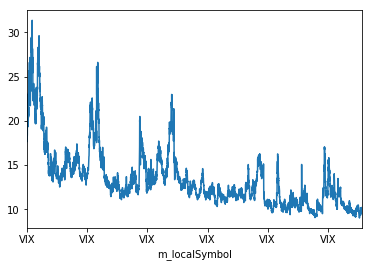

In [25]:
orig_data.loc['VIX'].open.plot()

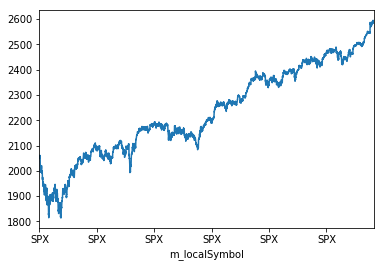

In [26]:
orig_data.loc['SPX'].open.plot()